In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
google = pd.read_csv("GOOG.csv", index_col='date')
apple = pd.read_csv("AAPL.csv", index_col='date')
amazon = pd.read_csv("AMZN.csv", index_col='date')
microsoft = pd.read_csv("MSFT.csv", index_col='date')
walmart = pd.read_csv("Walmart.csv", index_col='date')

In [3]:
apple.head(10)

,close,volume,open,high,low
date,,,,,
2019/02/08,170.41,23793830.0,168.99,170.660,168.4200
2019/02/07,170.94,31644240.0,172.40,173.940,170.3400
2019/02/06,174.24,28204640.0,174.65,175.570,172.8531
2019/02/05,174.18,36054570.0,172.86,175.080,172.3501
2019/02/04,171.25,31384720.0,167.41,171.655,167.2800
2019/02/01,166.52,32644590.0,166.96,168.980,165.9300
2019/01/31,166.44,40613260.0,166.11,169.000,164.5600
2019/01/30,165.25,60800480.0,163.25,166.150,160.2300
2019/01/29,154.68,39914850.0,156.25,158.130,154.1100


In [4]:
walmart.drop(walmart.index[-1], inplace=True)

In [5]:
walmart.head()
### here we wanted to remove a row that contained an unfinished stock market day 

,close,volume,open,high,low
date,,,,,
16:00,95.58,"6,169,080",96.36,96.69,95.14
2019/02/08,95.58,5154483.0000,96.34,96.69,95.14
2019/02/07,96.73,7009881.0000,95.11,96.82,95.00
2019/02/06,95.64,4263653.0000,95.43,96.01,95.22
2019/02/05,95.60,5939171.0000,95.25,95.94,95.02


### open means the opening price of the day, close means the closing price at the end of the day

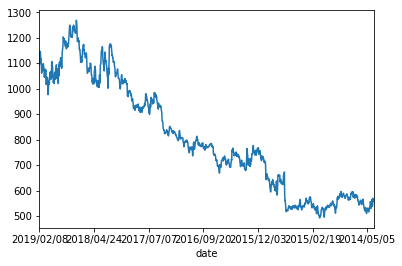

In [6]:
google['close'].plot()

### this graph looks problematic, because it contains all the years from the present to the past, we should thus reverse the graph

In [7]:
google = pd.read_csv("GOOG.csv", index_col='date')[::-1]
apple = pd.read_csv("AAPL.csv", index_col='date')[::-1]
amazon = pd.read_csv("AMZN.csv", index_col='date')[::-1]
microsoft = pd.read_csv("MSFT.csv", index_col='date')[::-1]
walmart = pd.read_csv("Walmart.csv", index_col='date')[::-1]

In [8]:
walmart.drop(walmart.index[-1], inplace=True)

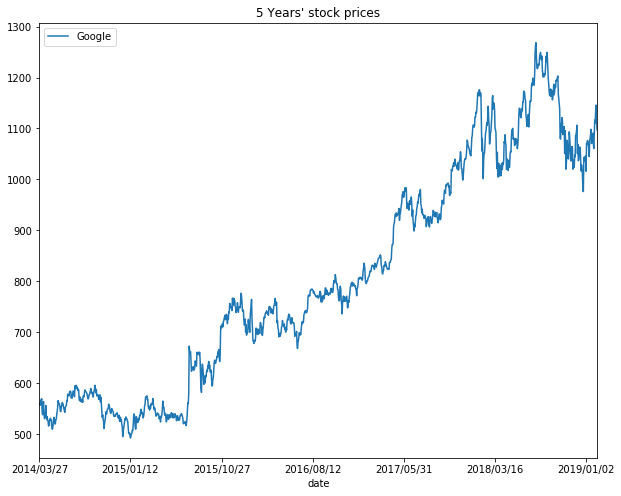

In [9]:
google['close'].plot(figsize=(10, 8), label="Google", title="5 Years' stock prices")
plt.legend()

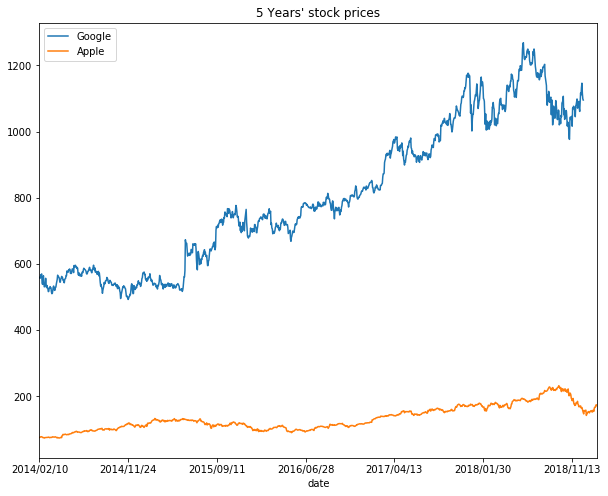

In [10]:
google['close'].plot(figsize=(10, 8), label="Google", title="5 Years' stock prices")
apple['close'].plot(label="Apple")
plt.legend()

# 5 Years' Stock Exchange

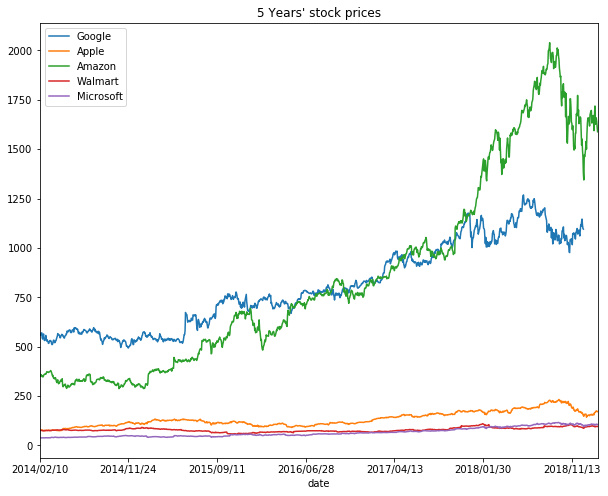

In [11]:
google['close'].plot(figsize=(10, 8), label="Google", title="5 Years' stock prices")
apple['close'].plot(label="Apple")
amazon['close'].plot(label="Amazon")
walmart['close'].plot(label="Walmart")
microsoft['close'].plot(label="Microsoft")
plt.legend()

## This data is scraped from Nasdaq, gathered in February 2019


In [12]:
walmart['volume'] = [float(each) for each in walmart['volume']]

In [13]:
try:
    for each in walmart['volume']:
        float(each) 
except:
    print(each.replace())

# 5 Years' Trade Volume

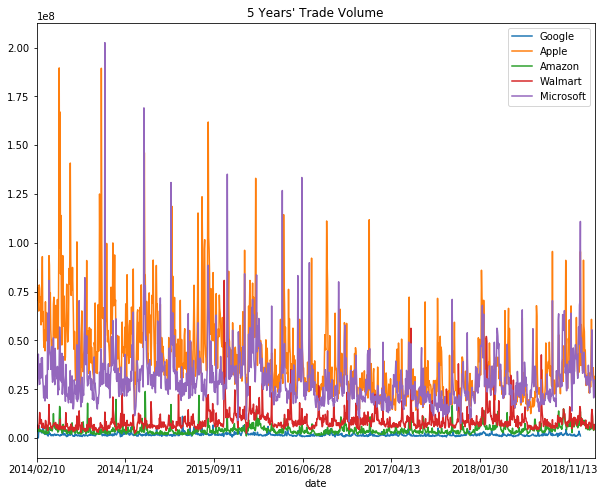

In [14]:
google['volume'].plot(figsize=(10, 8), label="Google", title="5 Years' Trade Volume")
apple['volume'].plot(label="Apple")
amazon['volume'].plot(label="Amazon")
walmart['volume'].plot(label="Walmart")
microsoft['volume'].plot(label="Microsoft")
plt.legend()

In [15]:
walmart['volume'][0]

6204086.0

### The graph shows certain high peaks. What caused the volume to go up on those stock days? 
### We googled what happened: "Minecraft to become Microsoft property" on September 19th, 2014

# List Comprehension
walmart['volume'] = [float(each) for each in walmart['volume']]

In [16]:
microsoft['volume'].argmax()

'2014/09/19'

# Total trade values in 5 years

In [17]:
google['total trade'] = google['open']*google['volume']

In [18]:
amazon['total trade'] = amazon['open']*amazon['volume']

In [19]:
walmart['total trade'] = walmart['open']*walmart['volume']

In [20]:
microsoft['total trade'] = microsoft['open']*microsoft['volume']

In [21]:
apple['total trade'] = apple['open']*apple['volume']

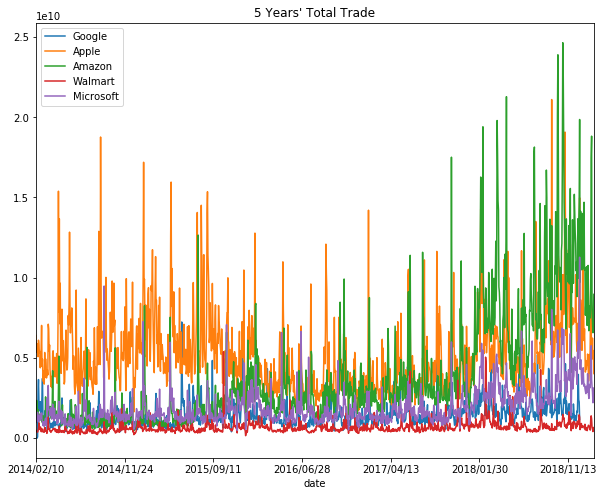

In [22]:
google['total trade'].plot(figsize=(10, 8), label="Google", title="5 Years' Total Trade")
apple['total trade'].plot(label="Apple")
amazon['total trade'].plot(label="Amazon")
walmart['total trade'].plot(label="Walmart")
microsoft['total trade'].plot(label="Microsoft")
plt.legend()

In [23]:
amazon['total trade'].argmax()

'2018/10/26'

### we can calculate the moving average during the time frame of 5 years by calculating a 50 or 200 days interval.

## Google 

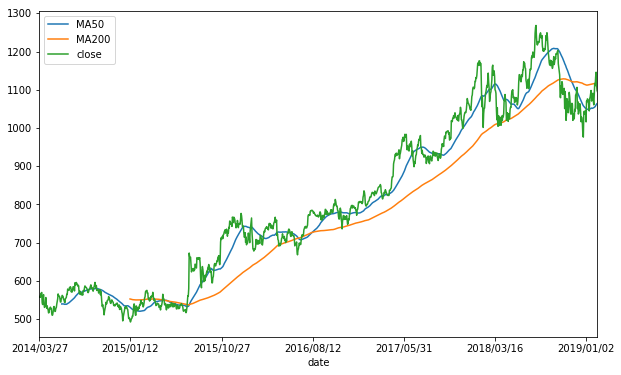

In [24]:
google['MA50'] = google['close'].rolling(50).mean()
google['MA200'] = google['close'].rolling(200).mean()
google[['MA50', 'MA200', 'close']].plot(figsize=(10,6))

### MA50 is the moving average of 50 days

### we want three columns of Google data

# Amazon

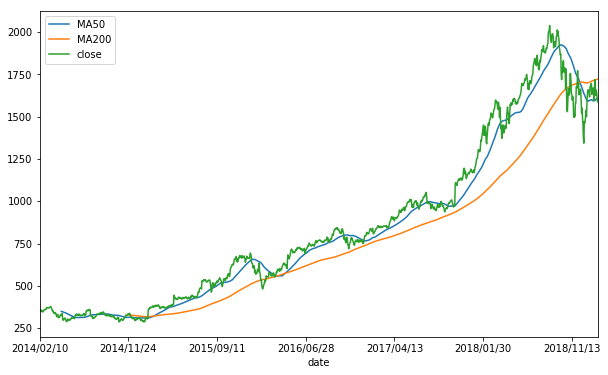

In [25]:
amazon['MA50'] = amazon['close'].rolling(50).mean()
amazon['MA200'] = amazon['close'].rolling(200).mean()
amazon[['MA50', 'MA200', 'close']].plot(figsize=(10,6))

# Walmart

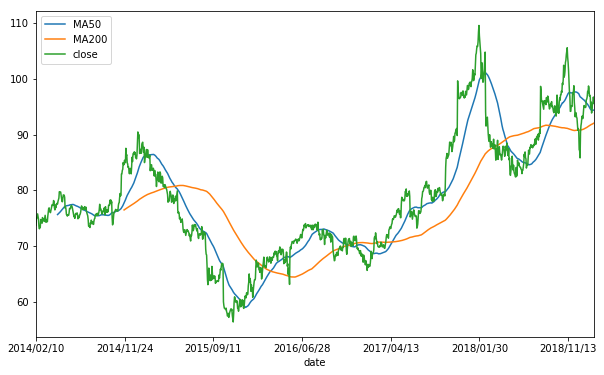

In [26]:
walmart['MA50'] = walmart['close'].rolling(50).mean()
walmart['MA200'] = walmart['close'].rolling(200).mean()
walmart[['MA50', 'MA200', 'close']].plot(figsize=(10,6))

# Apple

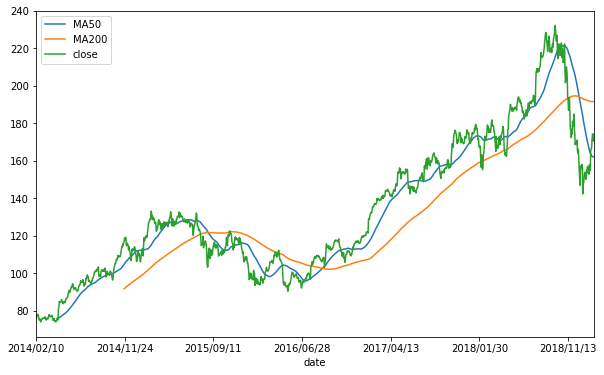

In [27]:
apple['MA50'] = apple['close'].rolling(50).mean()
apple['MA200'] = apple['close'].rolling(200).mean()
apple[['MA50', 'MA200', 'close']].plot(figsize=(10,6))

# Microsoft

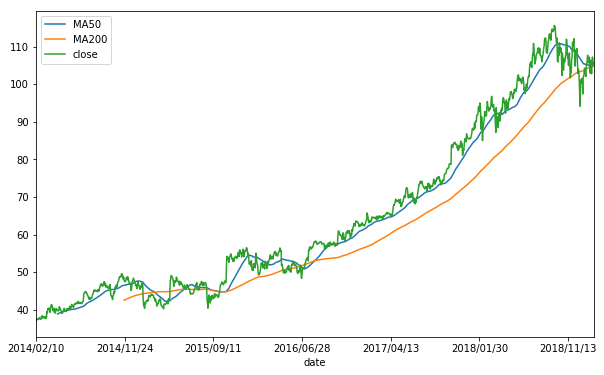

In [28]:
microsoft['MA50'] = microsoft['close'].rolling(50).mean()
microsoft['MA200'] = microsoft['close'].rolling(200).mean()
microsoft[['MA50', 'MA200', 'close']].plot(figsize=(10,6))

### Next, we will plot a matrix to see the correlation with each graph

# Correlations

In [29]:
from pandas.plotting import scatter_matrix

In [30]:
all_companies = pd.concat([amazon['close'], apple['close'], google['close'], microsoft['close'], walmart['close']], axis=1)
all_companies.columns = ["Amazon", "Apple", "Google", "Microsoft", "Walmart"]

### concat = we merge columns into one datasets

In [31]:
all_companies.head()

,Amazon,Apple,Google,Microsoft,Walmart
2014/02/10,360.87,75.5700,NaN,36.800,73.76
2014/02/11,361.79,76.5657,NaN,37.175,74.80
2014/02/12,349.25,76.5600,NaN,37.470,74.96
2014/02/13,357.20,77.7757,NaN,37.610,75.36
2014/02/14,357.35,77.7128,NaN,37.620,75.79


### Nasdaq stock material had missing data on Google on a specific year!! This is why we get NaN

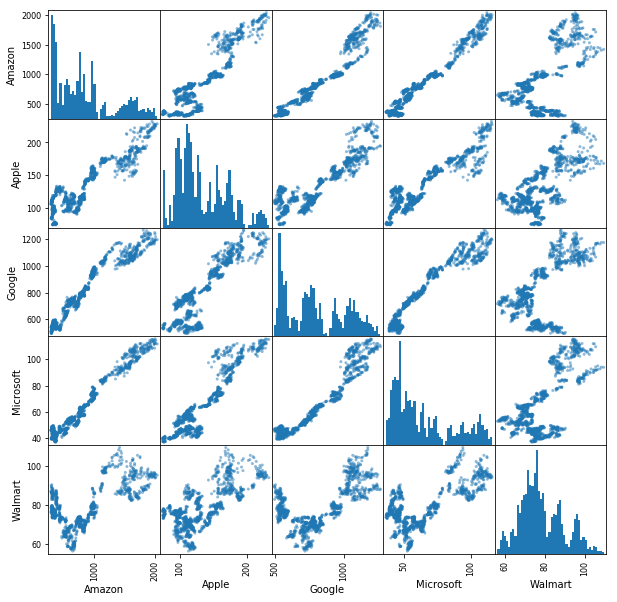

In [32]:
scatter_matrix(all_companies, alpha=0.5, figsize=(10,10), hist_kwds={'bins': 50})
plt.show()

### Each square shows the correlation of the given two stock data sets and their relations. The straight scatter lines, like Amazon/Microsoft show that the two companies are interdependent. 

### This is called a positive relationship. If one stock goes up, the other one is very likely to go up as well. A negative relationship would imply that while other goes up, the other would go down. 

### If the scatter pattern is widespread, there is little correlation 

# Candlestick Chart

### It shows the difference between the opening and closing prices during a short period of time.

### In our example, we will examine a tima frame of 30 days.

In [33]:
from mpl_finance import candlestick_ochl
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
from datetime import datetime

In [35]:
google.index[0]

'2014/03/27'

### At this point of the programming lesson, we exited and restarted Jupyter Notebook ->
### it is wise to use Kernel -> restart and run all

In [36]:
index0 = google.index[0]
datetime.strptime(index0, '%Y/%m/%d')

datetime.datetime(2014, 3, 27, 0, 0)

### We did not specify hours and minutes, this is why the last two values are 0, 0

In [39]:
google_30days = google.iloc[-30:-1]


### For slicing, we use iloc, which is the index location

In [51]:
google_30days["date_axis"] = [datetime.strptime(each, '%Y/%m/%d') for each in google_30days.index]

In [54]:
google_30days["date_axis"] = [date2num(each) for each in google_30days["date_axis"]]

In [59]:
google_30days_values = [tuple(vals) for vals in google_30days[['date_axis', 'open', 'close', 'high', 'low']].values]

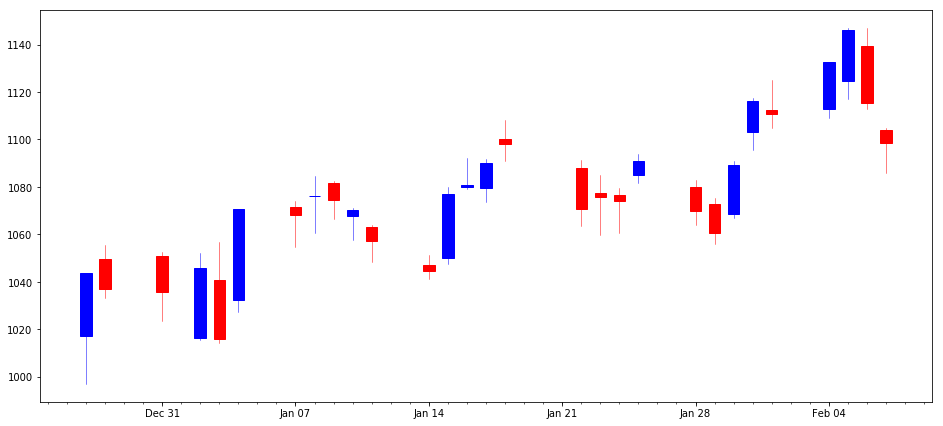

In [65]:
fig, ax = plt.subplots(figsize=(16,8))
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
WeekFormatter = DateFormatter('%b %d')
DayFormatter = DateFormatter("%d")

fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(WeekFormatter)

candlestick_ochl(ax, google_30days_values, width=0.6, colorup='b')
plt.show()

### Homework: Build candlestick graphs for Apple, Amazon, Microsoft, and  Walmart

# Amazon

In [67]:
amazon.index[0]

'2014/02/10'

In [68]:
index0 = amazon.index[0]
datetime.strptime(index0, '%Y/%m/%d')

datetime.datetime(2014, 2, 10, 0, 0)

In [69]:
amazon_30days = amazon.iloc[-30:-1]

In [70]:
amazon_30days["date_axis"] = [datetime.strptime(each, '%Y/%m/%d') for each in amazon_30days.index]

In [71]:
amazon_30days["date_axis"] = [date2num(each) for each in amazon_30days["date_axis"]]

In [72]:
amazon_30days_values = [tuple(vals) for vals in amazon_30days[['date_axis', 'open', 'close', 'high', 'low']].values]

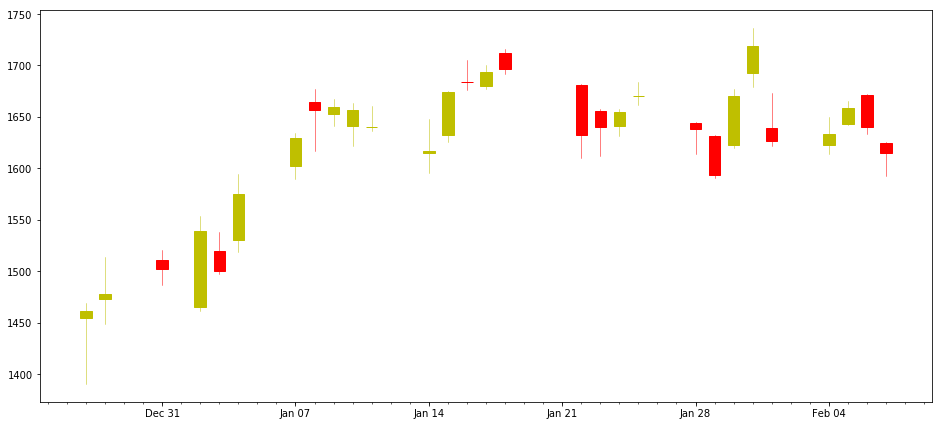

In [74]:
fig, ax = plt.subplots(figsize=(16,8))
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
WeekFormatter = DateFormatter('%b %d')
DayFormatter = DateFormatter("%d")

fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(WeekFormatter)

candlestick_ochl(ax, amazon_30days_values, width=0.6, colorup='y')
plt.show()

# Microsoft 

In [76]:
microsoft.index[0]

'2014/02/10'

In [77]:
index0 = microsoft.index[0]
datetime.strptime(index0, '%Y/%m/%d')

datetime.datetime(2014, 2, 10, 0, 0)

In [78]:
microsoft_30days = microsoft.iloc[-30:-1]

In [79]:
microsoft_30days["date_axis"] = [datetime.strptime(each, '%Y/%m/%d') for each in microsoft_30days.index]

In [80]:
microsoft_30days["date_axis"] = [date2num(each) for each in microsoft_30days["date_axis"]]

In [81]:
microsoft_30days_values = [tuple(vals) for vals in microsoft_30days[['date_axis', 'open', 'close', 'high', 'low']].values]

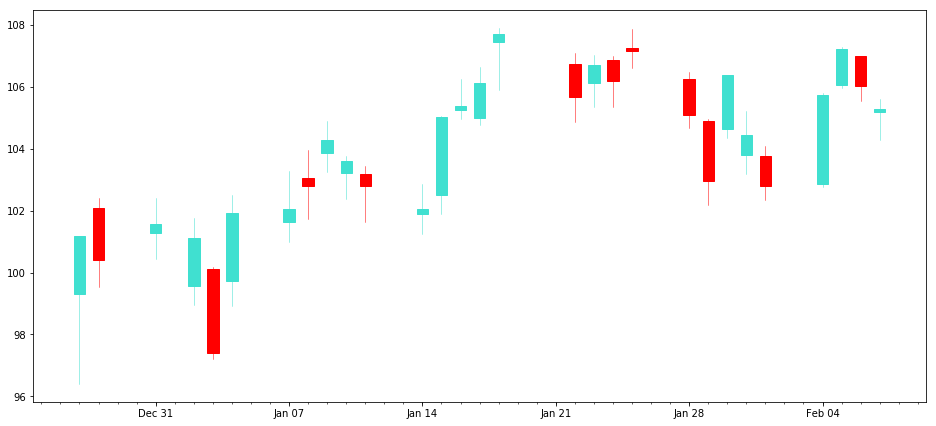

In [97]:
fig, ax = plt.subplots(figsize=(16,8))
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
WeekFormatter = DateFormatter('%b %d')
DayFormatter = DateFormatter("%d")

fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(WeekFormatter)

candlestick_ochl(ax, microsoft_30days_values, width=0.6, colorup='turquoise')
plt.show()

# Walmart

In [86]:
walmart.index[0]

'2014/02/10'

In [87]:
index0 = walmart.index[0]
datetime.strptime(index0, '%Y/%m/%d')

datetime.datetime(2014, 2, 10, 0, 0)

In [88]:
walmart_30days = walmart.iloc[-30:-1]

In [89]:
walmart_30days["date_axis"] = [datetime.strptime(each, '%Y/%m/%d') for each in walmart_30days.index]

In [90]:
walmart_30days["date_axis"] = [date2num(each) for each in walmart_30days["date_axis"]]

In [91]:
walmart_30days_values = [tuple(vals) for vals in walmart_30days[['date_axis', 'open', 'close', 'high', 'low']].values]

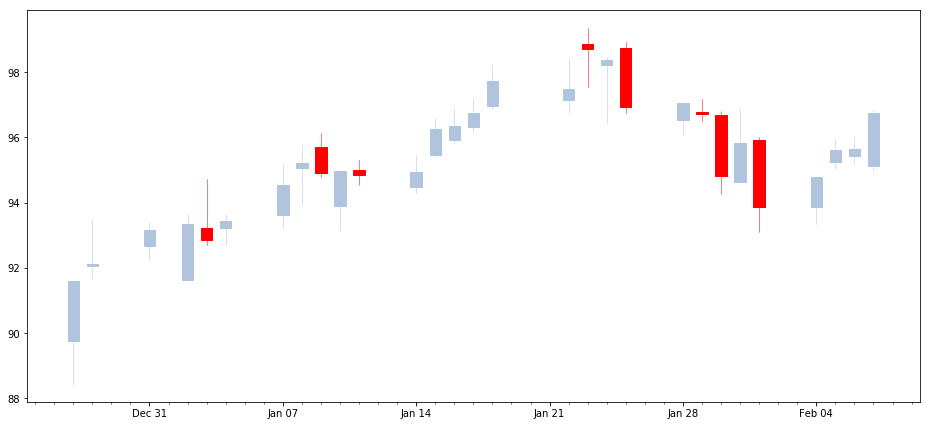

In [96]:
fig, ax = plt.subplots(figsize=(16,8))
mondays = WeekdayLocator(MONDAY)
alldays = DayLocator()
WeekFormatter = DateFormatter('%b %d')
DayFormatter = DateFormatter("%d")

fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(WeekFormatter)

candlestick_ochl(ax, walmart_30days_values, width=0.6, colorup='lightsteelblue')
plt.show()